In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

A dataset of 500 patient comments from seven hospitals in Portugal was used for preprocessing and classification. A bag-of-words model was used to extract features, and CountVectorizer was used to convert text documents into token counts. Six supervised learning algorithms were used, with hyperparameter performance optimized using GridSearch. Performance was assessed using confusion matrix, accuracy score, and classification report metrics.

In [2]:
dataset=pd.read_excel(r'C:\Users\Zohreh HP17\Desktop\Final Hospital Review\Dataset\Tipo_1_-_cluster_2_CG -English - Last version 2.14.2023.xlsx')

For dataset I Just considered two columns. Review column that I used google translate for translation from Portuguese in English, and also Feeling column that 0 in it representative negative feeling and 1 for positive feeling.

In [3]:
dataset

,Review,FINAL Feeling
0,"I waited 8 hours to be attended to, during whi...",Dissatisfied
1,It could be worse for a public hospital....,Dissatisfied
2,"On Sunday 01/26/2020, my mother, who is at the...",Dissatisfied
3,I would like to draw attention to the scheduli...,Dissatisfied
4,very bad attendances arrived morning 5:00 am u...,Dissatisfied
...,...,...
495,It's the closest hospital center where I go fo...,Satisfied
496,"Whenever I was received here, I was well atten...",Satisfied
497,Undoubtedly the best in the country! Not in i...,Satisfied
498,I underwent an aortic valve at the Cardiothora...,Satisfied


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review         500 non-null    object
 1   FINAL Feeling  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


C:\Users\Zohreh HP17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


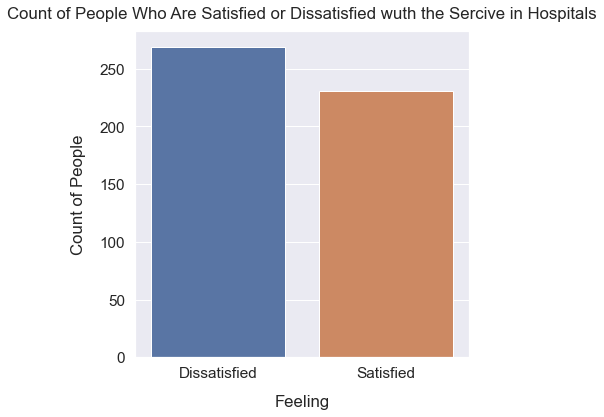

In [5]:
plt.figure(figsize=(6,6))
sns.set(font_scale=1.4)
sns.countplot(dataset['FINAL Feeling'])
plt.xlabel("Feeling", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Are Satisfied or Dissatisfied wuth the Sercive in Hospitals", y=1.02);
plt.show()

In [6]:
dataset['Length']=dataset['Review'].apply(len)
dataset

,Review,FINAL Feeling,Length
0,"I waited 8 hours to be attended to, during whi...",Dissatisfied,745
1,It could be worse for a public hospital....,Dissatisfied,43
2,"On Sunday 01/26/2020, my mother, who is at the...",Dissatisfied,750
3,I would like to draw attention to the scheduli...,Dissatisfied,1004
4,very bad attendances arrived morning 5:00 am u...,Dissatisfied,415
...,...,...,...
495,It's the closest hospital center where I go fo...,Satisfied,108
496,"Whenever I was received here, I was well atten...",Satisfied,90
497,Undoubtedly the best in the country! Not in i...,Satisfied,599
498,I underwent an aortic valve at the Cardiothora...,Satisfied,1206


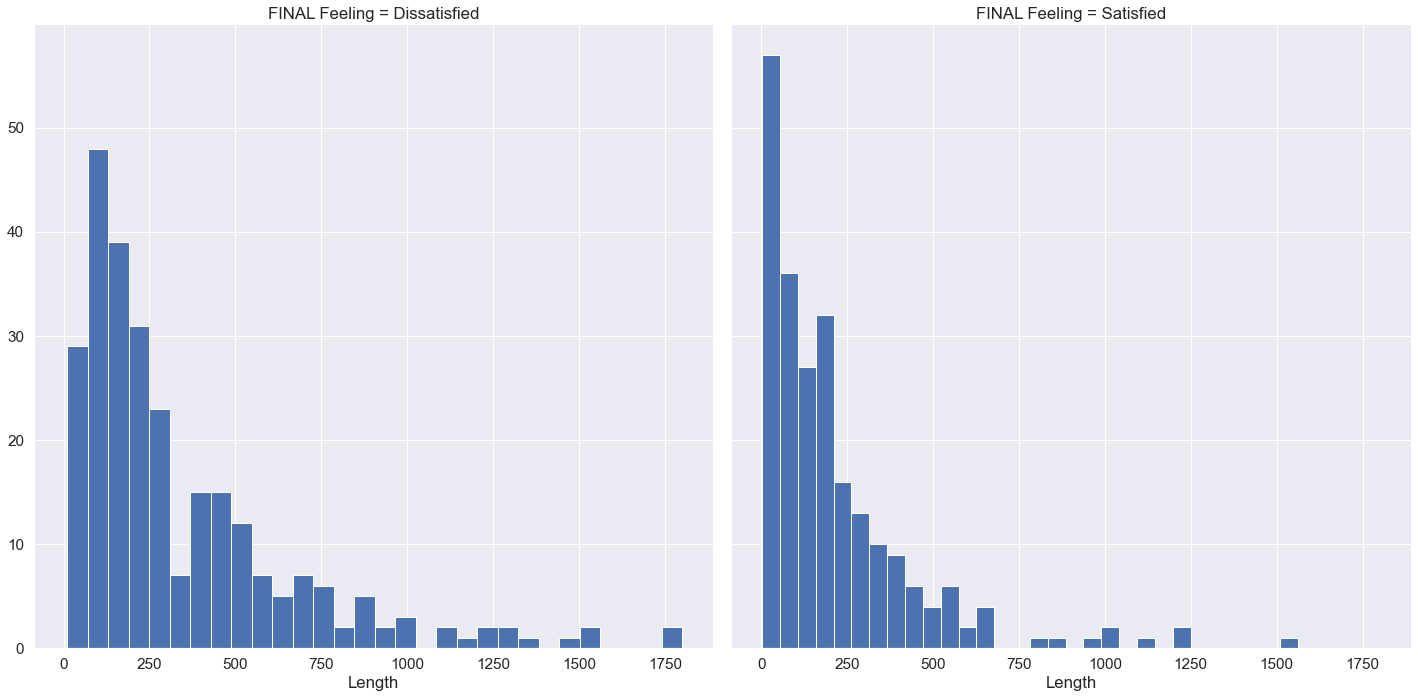

In [7]:
g=sns.FacetGrid(data=dataset,col="FINAL Feeling",col_wrap=2,legend_out=True,height=10,margin_titles=True)
g.map(plt.hist,"Length",bins=30)
plt.show()

In [8]:
dataset["Length"].describe()

count     500.00000
mean      284.00200
std       297.98346
min         3.00000
25%        88.00000
50%       190.00000
75%       386.50000
max      1801.00000
Name: Length, dtype: float64

In [9]:
dataset["FINAL Feeling"]=dataset["FINAL Feeling"].apply(lambda x:1 if x=="Satisfied" else 0)

In [10]:
dataset.drop("Length",axis=1,inplace=True)

In [11]:

dataset

,Review,FINAL Feeling
0,"I waited 8 hours to be attended to, during whi...",0
1,It could be worse for a public hospital....,0
2,"On Sunday 01/26/2020, my mother, who is at the...",0
3,I would like to draw attention to the scheduli...,0
4,very bad attendances arrived morning 5:00 am u...,0
...,...,...
495,It's the closest hospital center where I go fo...,1
496,"Whenever I was received here, I was well atten...",1
497,Undoubtedly the best in the country! Not in i...,1
498,I underwent an aortic valve at the Cardiothora...,1


In [12]:
#Cleaning Text
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to C:\Users\Zohreh
[nltk_data]     HP17\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#Cleaning Text
corpus=[]
for i in range (0,500):
    review=re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    Word_remove=['not','did not','didnt','do','dont','dosent','hadnt','had not','hasnt','has not','have not','havnt']
    all_stopwords = [e for e in all_stopwords if e not in set(Word_remove)]
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus.append(review)
    

In [14]:
print(corpus)

['wait hour attend time faint due serious situat even concern understand lot peopl deal worri aggress ill nurs hour wait sick alreadi go crazi calmli ask nurs chat animatedli inform decid yell like year old inadmiss wait doctor came ask late yell ask never late doctor turn h late never treat disrespect peopl without sensit not practic profess', 'could wors public hospit', 'sunday mother amper perra home felt bad fell crack head everyth happen right morn home wash hospit agueda agueda transfer hospit agueda aveiro low vouga noon night doctor result exam not review today monday still wait doctor review exam talk daughter wait doctor sinc not way treat elderli famili member alreadi wrote complaint book help either one give star star give horribl', 'would like draw attent schedul exam respons commun not intend critic explan send inform act effect made three prepar colonoscopi postpon messag not arriv good time done day exam first done use cell phone left regist cell phone number difficult 

In [15]:
#Creating teh bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,-1].values

In [16]:
print(len(x))
print(x.shape)

500
(500, 2226)


In [17]:
df_cv=pd.DataFrame(x,columns=cv.get_feature_names())
df_cv['class']=y
df_cv_satisfied=df_cv[df_cv['class']==1]
df_cv_Dissatisfied=df_cv[df_cv['class']==0]

In [18]:
df_sum_column_sat=pd.DataFrame(df_cv_satisfied.iloc[:,:-1].sum(axis=0),columns=['Sumation of Words'])
df_sum_column_sat=df_sum_column_sat.nlargest(20,["Sumation of Words"])
df_sum_column_sat.reset_index(inplace=True)
df_sum_column_sat["Word"]=df_sum_column_sat["index"]
df_sum_column_sat.drop('index',axis=1,inplace=True)
df_sum_column_sat.sort_values('Sumation of Words',inplace=True)
df_sum_column_sat

,Sumation of Words,Word
19,29,surgeri
18,30,like
17,34,attent
16,35,alway
15,40,time
14,42,friendli
13,46,team
12,48,dr
11,50,care
10,56,excel


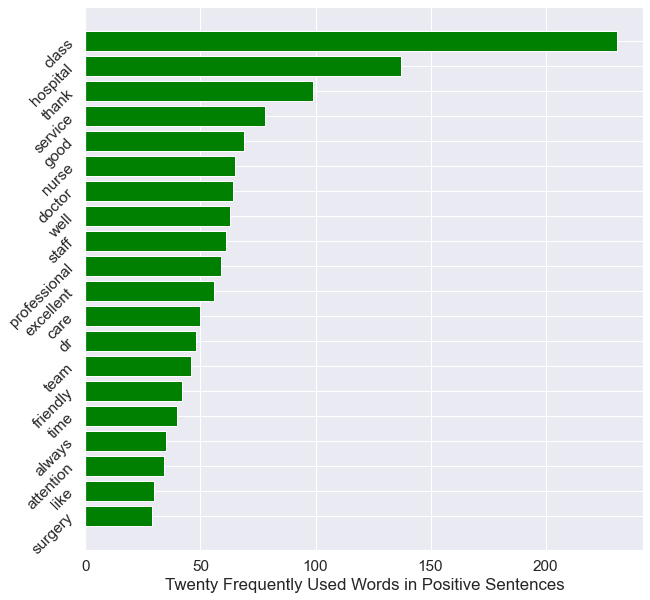

In [31]:
df_sum_column_sat=pd.DataFrame(df_cv_satisfied.iloc[:,:-1].sum(axis=0),columns=['Sumation of Words'])
df_sum_column_sat=df_sum_column_sat.nlargest(20,["Sumation of Words"])
df_sum_column_sat.reset_index(inplace=True)
df_sum_column_sat["Word"]=df_sum_column_sat["index"]
df_sum_column_sat.drop('index',axis=1,inplace=True)
df_sum_column_sat.sort_values('Sumation of Words',inplace=True)
plt.figure(figsize=(10,10))
X_axis = np.arange(len(df_sum_column_sat['Word']))
plt.barh(X_axis,df_sum_column_sat['Sumation of Words'],color="green",)
plt.yticks(X_axis, ['surgery','like','attention','always','time','friendly','team','dr','care','excellent','professional','staff','well','doctor','nurse','good','service','thank','hospital','class'],rotation=45)
#plt.title("20 of the words with most frequncey for possitive review")
plt.xlabel("Twenty Frequently Used Words in Positive Sentences")
#plt.ylabel("count")    
plt.savefig("barh.png")

In [20]:
df_cv_Dissatisfied_sat=pd.DataFrame(df_cv_Dissatisfied.iloc[:,:-1].sum(axis=0),columns=['Sumation of Words'])
df_cv_Dissatisfied_sat=df_cv_Dissatisfied_sat.nlargest(20,['Sumation of Words'])
df_cv_Dissatisfied_sat.reset_index(inplace=True)
df_cv_Dissatisfied_sat["Word"]=df_cv_Dissatisfied_sat["index"]
df_cv_Dissatisfied_sat.drop('index',axis=1,inplace=True)
df_cv_Dissatisfied_sat.sort_values('Sumation of Words',inplace=True)
df_cv_Dissatisfied_sat

,Sumation of Words,Word
19,47,appoint
18,48,even
17,49,shame
16,53,room
15,56,without
14,58,emerg
13,60,go
12,66,patient
11,71,do
10,72,one


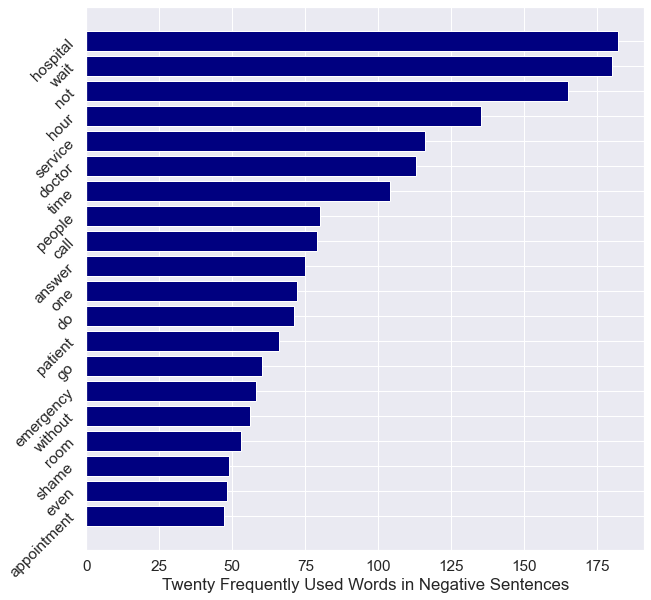

In [32]:
df_cv_Dissatisfied_sat=pd.DataFrame(df_cv_Dissatisfied.iloc[:,:-1].sum(axis=0),columns=['Sumation of Words'])
df_cv_Dissatisfied_sat=df_cv_Dissatisfied_sat.nlargest(20,['Sumation of Words'])
df_cv_Dissatisfied_sat.reset_index(inplace=True)
df_cv_Dissatisfied_sat["Word"]=df_cv_Dissatisfied_sat["index"]
df_cv_Dissatisfied_sat.drop('index',axis=1,inplace=True)
df_cv_Dissatisfied_sat.sort_values('Sumation of Words',inplace=True)

plt.figure(figsize=(10,10))
X_axis = np.arange(len(df_cv_Dissatisfied_sat['Word']))
plt.barh(X_axis,df_cv_Dissatisfied_sat['Sumation of Words'],color="navy")
plt.yticks(X_axis, ['appointment','even','shame','room','without','emergency','go','patient','do','one','answer','call','people','time','doctor','service','hour','not','wait','hospital'],rotation=45)
#plt.title("20 of the words with most frequncey for negetive review")
plt.xlabel("Twenty Frequently Used Words in Negative Sentences")
#plt.ylabel("count")    
plt.savefig("barhh.png")

In [33]:
#spliting dataset into train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12,stratify=y)

In [60]:
print(len(x_train))
print(len(x_test))

350
150


In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [62]:
# Creating a SupportVectorMachine
from sklearn.svm import SVC

In [63]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000,1100], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid_SVM = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 5,cv=5)
  
# fitting the model for grid search
predict_train =grid_SVM.fit(x_train, y_train).predict(x_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.7s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.7s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV 2/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV 3/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV 4/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.6s
[CV 5/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV 2/5] END .....................C=0.1, gamma

[CV 2/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV 3/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV 4/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV 5/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV 1/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.7s
[CV 2/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.9s
[CV 3/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.9s
[CV 4/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.9s
[CV 5/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.8s
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time=   1.5s
[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time=   1.2s
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time=   1.2s
[CV 4/5] END ...............

[CV 4/5] END ...................C=10, gamma=1, kernel=linear; total time=   0.7s
[CV 5/5] END ...................C=10, gamma=1, kernel=linear; total time=   0.7s
[CV 1/5] END .....................C=10, gamma=1, kernel=poly; total time=   0.9s
[CV 2/5] END .....................C=10, gamma=1, kernel=poly; total time=   0.7s
[CV 3/5] END .....................C=10, gamma=1, kernel=poly; total time=   0.7s
[CV 4/5] END .....................C=10, gamma=1, kernel=poly; total time=   1.2s
[CV 5/5] END .....................C=10, gamma=1, kernel=poly; total time=   1.1s
[CV 1/5] END ......................C=10, gamma=1, kernel=rbf; total time=   1.5s
[CV 2/5] END ......................C=10, gamma=1, kernel=rbf; total time=   1.4s
[CV 3/5] END ......................C=10, gamma=1, kernel=rbf; total time=   1.6s
[CV 4/5] END ......................C=10, gamma=1, kernel=rbf; total time=   1.6s
[CV 5/5] END ......................C=10, gamma=1, kernel=rbf; total time=   1.4s
[CV 1/5] END ...............

[CV 1/5] END ....................C=100, gamma=1, kernel=poly; total time=   0.6s
[CV 2/5] END ....................C=100, gamma=1, kernel=poly; total time=   0.7s
[CV 3/5] END ....................C=100, gamma=1, kernel=poly; total time=   0.6s
[CV 4/5] END ....................C=100, gamma=1, kernel=poly; total time=   0.6s
[CV 5/5] END ....................C=100, gamma=1, kernel=poly; total time=   0.6s
[CV 1/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.8s
[CV 2/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.8s
[CV 3/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.8s
[CV 4/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.8s
[CV 5/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.9s
[CV 1/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.2s
[CV 2/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.2s
[CV 3/5] END ...............

[CV 3/5] END ...................C=1000, gamma=1, kernel=poly; total time=   0.7s
[CV 4/5] END ...................C=1000, gamma=1, kernel=poly; total time=   0.7s
[CV 5/5] END ...................C=1000, gamma=1, kernel=poly; total time=   0.8s
[CV 1/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.9s
[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   1.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.9s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.8s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.9s
[CV 1/5] END ................C=1000, gamma=1, kernel=sigmoid; total time=   0.2s
[CV 2/5] END ................C=1000, gamma=1, kernel=sigmoid; total time=   0.2s
[CV 3/5] END ................C=1000, gamma=1, kernel=sigmoid; total time=   0.3s
[CV 4/5] END ................C=1000, gamma=1, kernel=sigmoid; total time=   0.2s
[CV 5/5] END ...............

[CV 5/5] END ...................C=1100, gamma=1, kernel=poly; total time=   0.7s
[CV 1/5] END ....................C=1100, gamma=1, kernel=rbf; total time=   1.0s
[CV 2/5] END ....................C=1100, gamma=1, kernel=rbf; total time=   1.3s
[CV 3/5] END ....................C=1100, gamma=1, kernel=rbf; total time=   1.1s
[CV 4/5] END ....................C=1100, gamma=1, kernel=rbf; total time=   1.4s
[CV 5/5] END ....................C=1100, gamma=1, kernel=rbf; total time=   0.9s
[CV 1/5] END ................C=1100, gamma=1, kernel=sigmoid; total time=   0.1s
[CV 2/5] END ................C=1100, gamma=1, kernel=sigmoid; total time=   0.2s
[CV 3/5] END ................C=1100, gamma=1, kernel=sigmoid; total time=   0.2s
[CV 4/5] END ................C=1100, gamma=1, kernel=sigmoid; total time=   0.2s
[CV 5/5] END ................C=1100, gamma=1, kernel=sigmoid; total time=   0.4s
[CV 1/5] END ...............C=1100, gamma=0.1, kernel=linear; total time=   0.7s
[CV 2/5] END ...............

In [64]:
# print best parameter after tuning
print(grid_SVM.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_SVM.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear', probability=True)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]


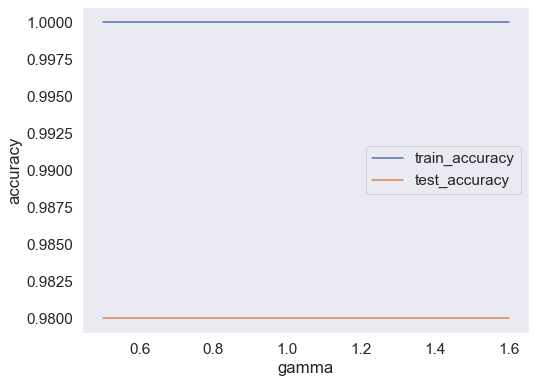

In [80]:
# changing gamma for testing how good model works around the gamma
gamma=[0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6]
train_accuracy=np.empty(len(gamma))
test_accuracy=np.empty(len(gamma))


for i,k in enumerate (gamma):
    SVM_model=SVC(C=0.1, gamma= k, kernel= 'linear')
    SVM_model.fit(x_train,y_train)
    train_accuracy[i]=SVM_model.score(x_train,y_train)
    test_accuracy[i]=SVM_model.score(x_test,y_test)
plt.figure(figsize=(8,6))    
plt.plot(gamma,train_accuracy,label="train_accuracy") 
plt.plot(gamma,test_accuracy,label="test_accuracy")
plt.legend()
plt.xlabel("gamma")
plt.ylabel("accuracy") 
plt.grid()
plt.savefig("SVM gamma.png")
print(train_accuracy)
print(test_accuracy)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]


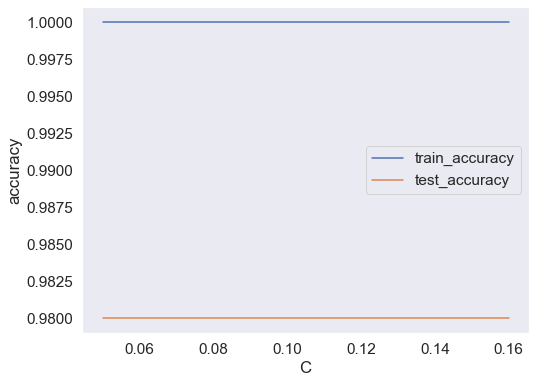

In [81]:
# changing c for testing how good model works around the c
C=[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16]
train_accuracy=np.empty(len(C))
test_accuracy=np.empty(len(C))


for i,k in enumerate (C):
    SVM_model=SVC(C=k, gamma= 1, kernel= 'linear')
    SVM_model.fit(x_train,y_train)
    train_accuracy[i]=SVM_model.score(x_train,y_train)
    test_accuracy[i]=SVM_model.score(x_test,y_test)
plt.figure(figsize=(8,6))    
plt.plot(C,train_accuracy,label="train_accuracy") 
plt.plot(C,test_accuracy,label="test_accuracy")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy") 
plt.grid()
plt.savefig("SVM C.png")
print(train_accuracy)
print(test_accuracy)

In [68]:
# predict the target on the test dataset
y_pred =grid_SVM.predict(x_test)



In [69]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1),end='\n')


[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]

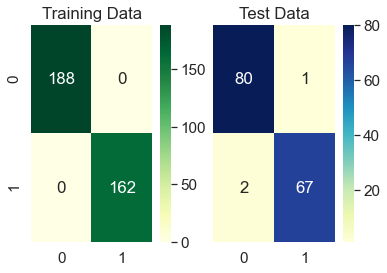

In [70]:
from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,predict_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g',cmap="YlGnBu",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [71]:
# Accuracy Score on test dataset
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report              
accuracy_test = accuracy_score(y_train,predict_train)
print('accuracy_score on Train dataset : ', accuracy_test)
accuracy_test = accuracy_score(y_test,y_pred)
print('accuracy_score on Test dataset : ', accuracy_test)


accuracy_score on Train dataset :  1.0
accuracy_score on Test dataset :  0.98


In [72]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
print(classification_report(y_train,predict_train))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       162

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        81
           1       0.99      0.97      0.98        69

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [73]:
#ROC
y_pred_proba=grid_SVM.predict_proba(x_test)[:,1]
y_pred_proba

array([1.00000000e+00, 9.99998342e-01, 9.97223150e-01, 9.96878466e-01,
       2.51493274e-04, 2.27650041e-04, 9.97223598e-01, 9.78005329e-04,
       9.99999924e-01, 3.02455993e-04, 9.44537208e-05, 9.75730725e-04,
       3.85175600e-03, 1.79919879e-04, 8.60416082e-01, 9.99999150e-01,
       2.30253226e-02, 2.11780335e-01, 6.14806923e-05, 1.83343985e-02,
       9.92453932e-01, 4.71063237e-02, 5.07100476e-02, 1.18824688e-06,
       2.65370279e-04, 9.99999671e-01, 1.17912274e-02, 9.99999886e-01,
       2.09520104e-05, 3.36425200e-03, 7.53846522e-05, 1.43451953e-05,
       9.99999826e-01, 1.86869507e-02, 1.00000010e-07, 9.45136012e-01,
       4.74200710e-02, 1.00000010e-07, 9.99998870e-01, 9.99989158e-01,
       3.25172970e-04, 2.85094725e-03, 9.99999921e-01, 9.80615551e-01,
       9.99987946e-01, 9.90153724e-01, 9.99997622e-01, 3.79594164e-01,
       6.23230133e-03, 3.48040108e-04, 9.99993207e-01, 5.14772515e-04,
       9.91937521e-01, 9.97430537e-01, 1.82370355e-02, 9.99999298e-01,
      

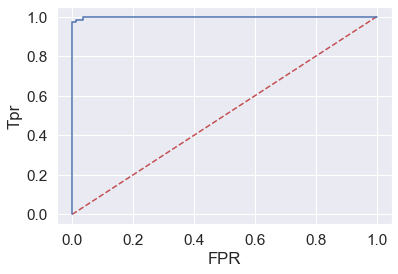

In [74]:
#ROC Diagram
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

plt.plot([0,1],[0,1],"r--")
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("Tpr")
plt.show()

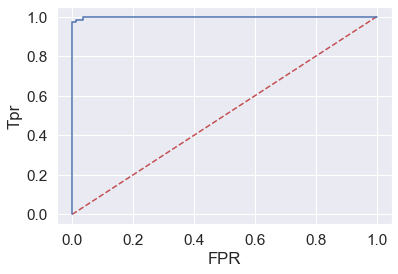

In [78]:
#ROC Diagram
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

plt.plot([0,1],[0,1],"r--")
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("Tpr")
plt.grid()
plt.show()

In [35]:
Sample_text=["This was the best team of medical staff I have been around in a long time. I would love to have them around if I ever get sick again. The Doctor had been busy but still took the time to make me feel like I was the only patient there. The gentleman that took my initial information was terrific, he too made me feel like I was the first patient of the day. I loved visiting and if I need their service again I know I will be welcomed",
            "Thank you very much! Everyone is so friendly and I am very thankful you are in this area to care for us when we need you. Your hours you are available are wonderful. The Doctors, nurses & staff are professional and very thorough",
            "I have gone to Doctors Care for a couple years and have always been very satisfied with the care and attention that I have received.",
            "Both doctors were caring and concerned, friendly while maintaining professional and efficient standards of service. I was so very thankful for the excellent care I received at Doctors Care",
            "Very bad experience. To meet a gynecologist there, you have to first explain the reason to the op receptionist. Dr. Hafeez Rahman was very rude, that makes you refrain from even asking basic questions and made hurtful remarks. Lacked basic empathy in conversation. And they looted our money, in return for substandard service.Just another regressive gynec department, which seems to be the general scene in Kerala.",
            "Please do not visit this hospital as they don't value your time at all. the system is totally worst.whereas doctors are good but the staffs are rude and arrogant They should come up with an aappointment based system.Really bad.",
            "I am Satisfied!!",
            "I am not Satisfied."]

In [36]:
corpus_1=[]
for i in range (0,8):
    review=re.sub('[^a-zA-Z]',' ',Sample_text[i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    Word_remove=['not','did not','didnt','do','dont','dosent','hadnt','had not','hasnt','has not','have not','havnt']
    all_stopwords = [e for e in all_stopwords if e not in set(Word_remove)]
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus_1.append(review)

In [37]:
corpus_1

['best team medic staff around long time would love around ever get sick doctor busi still took time make feel like patient gentleman took initi inform terrif made feel like first patient day love visit need servic know welcom',
 'thank much everyon friendli thank area care us need hour avail wonder doctor nurs staff profession thorough',
 'gone doctor care coupl year alway satisfi care attent receiv',
 'doctor care concern friendli maintain profession effici standard servic thank excel care receiv doctor care',
 'bad experi meet gynecologist first explain reason op receptionist dr hafeez rahman rude make refrain even ask basic question made hurt remark lack basic empathi convers loot money return substandard servic anoth regress gynec depart seem gener scene kerala',
 'pleas do not visit hospit valu time system total worst wherea doctor good staff rude arrog come aappoint base system realli bad',
 'satisfi',
 'not satisfi']

In [38]:
testing_sample_vectorizer=cv.transform(corpus_1).toarray()

In [39]:
Sample_predict=grid_SVM.predict(testing_sample_vectorizer)

In [40]:
Sample_predict

array([0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

MultinomialNB

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid ={'alpha': (0.00001,0.0001,0.001,0.01,1) } 
gs_NB = GridSearchCV(MultinomialNB(), param_grid, refit = True, verbose = 5,cv=5)

# fitting the model for grid search
predict_train =gs_NB.fit(x_train, y_train).predict(x_train)

In [ ]:
gs_NB.best_params_

In [ ]:
gs_NB.best_score_

In [ ]:
gs_NB.cv_results_

In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(results_NB['alpha'], results_NB['test_score'], marker = '.')    
plt.xlabel('alpha')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison",color="red")
plt.grid()
plt.savefig("MNB Performance.png")

In [ ]:
# changing alpha for testing how good model works around the alpha
alpha=[0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6]
train_accuracy=np.empty(len(alpha))
test_accuracy=np.empty(len(alpha))

for i,k in enumerate (alpha):
    MultinomialNB_model=MultinomialNB(alpha=k)
    MultinomialNB_model.fit(x_train,y_train)
    train_accuracy[i]=MultinomialNB_model.score(x_train,y_train)
    test_accuracy[i]=MultinomialNB_model.score(x_test,y_test)
plt.figure(figsize=(8,6))    
plt.plot(alpha,train_accuracy,label="train_accuracy") 
plt.plot(alpha,test_accuracy,label="test_accuracy")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("accuracy") 
plt.grid()
plt.savefig("MNB Alpha.png")
print(train_accuracy)
print(test_accuracy)

In [ ]:
# Predicting the Test set results
y_pred=gs_NB.predict(x_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


In [ ]:
from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,predict_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
# Accuracy Score on test dataset
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report              
accuracy_test = accuracy_score(y_train,predict_train)
print('accuracy_score on Train dataset : ', accuracy_test)
accuracy_test = accuracy_score(y_test,y_pred)
print('accuracy_score on Test dataset : ', accuracy_test)

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
print(classification_report(y_train,predict_train))
print(classification_report(y_test,y_pred))

In [ ]:
#ROC
y_pred_proba=gs_NB.predict_proba(x_test)[:,1]
y_pred_proba

In [ ]:
#ROC Diagram
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

plt.plot([0,1],[0,1],"r--")
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("Tpr")
plt.show()